> [View Notebook on Kaggle](https://www.kaggle.com/code/nabeelvalley/time-series-stationarity)

# Components of Time Series data

- Trend
- Seasonality
- Irregularity
- Cyclicality

# When not to use Time Series Analyis

- Values are constant - it's pointless
- Values are in the form of functions - just use the function

# Stationarity

- Constant mean
- Constant variance
- Autovariance that does not depend on time

A stationary series has a high probability to follow the same pattern in future

## Stationarity Tests

- Rolling Statistics - moving average, moving variance, visualization
- ADCF Test

## ARIMA

ARIMA is a common model for analysis

The ARIMA model has the following parameters:: 

- P - Auto Regressive (AR)
- d - Integration (I)
- Q - Moving Average (MA)

# Applying the Above

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
df = df.set_index(['Month'])

df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

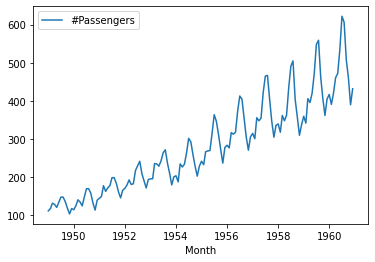

In [5]:
sns.lineplot(data=df)

In the above we can see that there is an upward trend as well as some seasonality

Next, we can check some summary statistics using a rolling mean approach

## Rolling Averages

> Note that for the rolling functions we use a window of 12, this is because the data has a seasonality of 12 months

<AxesSubplot:xlabel='Month'>

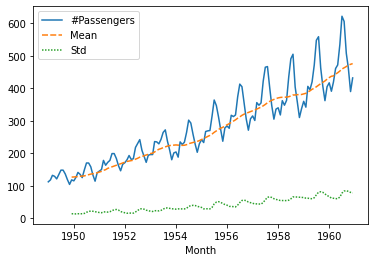

In [6]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

df_summary = df.assign(Mean=rolling_mean)
df_summary = df_summary.assign(Std=rolling_std)

sns.lineplot(data=df_summary)

Since the mean and standard deviation are not constant we can conclude that the data is not stationary

## ADF Test

The null hypothesis for the test is that the series is non-stationary, we reject it if the resulting probability > 0.05 (or some other threshold)

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def print_adf(adf):
    print('ADF test statistic', adf[0])
    print('p-value', adf[1])
    print('Lags used', adf[2])
    print('Observations used', adf[3])
    print('Critical values', adf[4])

In [9]:
adf = adfuller(df['#Passengers'])

print_adf(adf)

ADF test statistic 0.8153688792060472
p-value 0.991880243437641
Lags used 13
Observations used 130
Critical values {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In the result of the ADF test we can see that the p-value is much higher than 0.05 which means that the data is not stationary

Because the data is non-stationary the next think we need to do is estimate the trend

<AxesSubplot:xlabel='Month'>

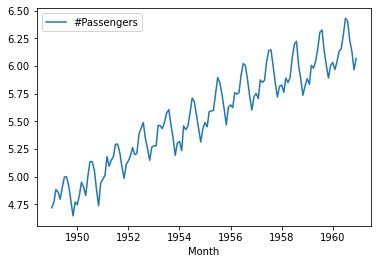

In [10]:
df_log = np.log(df)

sns.lineplot(data=df_log)

<AxesSubplot:xlabel='Month'>

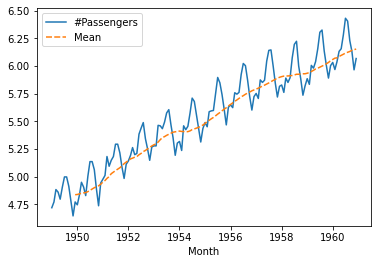

In [11]:
rolling_mean_log = df_log.rolling(window=12).mean()

df_summary = df_log.assign(Mean=rolling_mean_log)

sns.lineplot(data=df_summary)

Using the log there is still some residual effect visible, we can try taking a diff:

<AxesSubplot:xlabel='Month'>

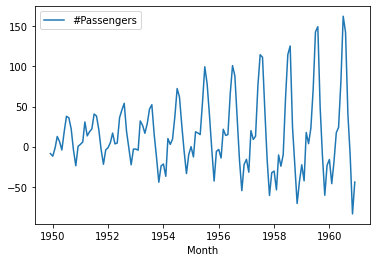

In [12]:
df_diff = df - rolling_mean

sns.lineplot(data=df_diff)

<AxesSubplot:xlabel='Month'>

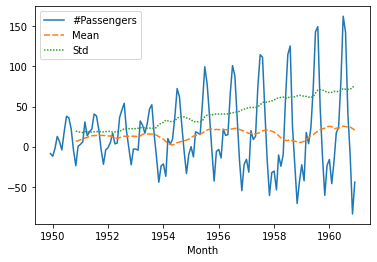

In [13]:
rolling_mean_diff = df_diff.rolling(window=12).mean()
rolling_std_diff = df_diff.rolling(window=12).std()

df_summary = df_diff.assign(Mean=rolling_mean_diff)
df_summary = df_summary.assign(Std=rolling_std_diff)

sns.lineplot(data=df_summary)

In [14]:
adf_diff = adfuller(df_diff.dropna())

print_adf(adf_diff)

ADF test statistic -3.1649681299551427
p-value 0.022104139473878973
Lags used 13
Observations used 119
Critical values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


We can do the same with the log:

<AxesSubplot:xlabel='Month'>

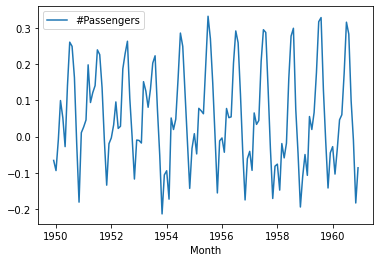

In [15]:
df_diff_log = df_log - rolling_mean_log

sns.lineplot(data=df_diff_log)

<AxesSubplot:xlabel='Month'>

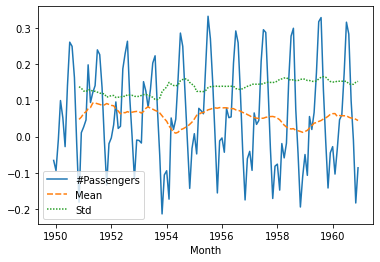

In [16]:
rolling_mean_diff_log = df_diff_log.rolling(window=12).mean()
rolling_std_diff_log = df_diff_log.rolling(window=12).std()

df_summary = df_diff_log.assign(Mean=rolling_mean_diff_log)
df_summary = df_summary.assign(Std=rolling_std_diff_log)

sns.lineplot(data=df_summary)

In [17]:
adf_diff_log = adfuller(df_diff_log.dropna())

print_adf(adf_diff_log)

ADF test statistic -3.162907991300889
p-value 0.02223463000124189
Lags used 13
Observations used 119
Critical values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


The ADF for the log diff is less than 0.05 so the result is stationary

We can also try a divide using the the original data and the rolling mean:

<AxesSubplot:xlabel='Month'>

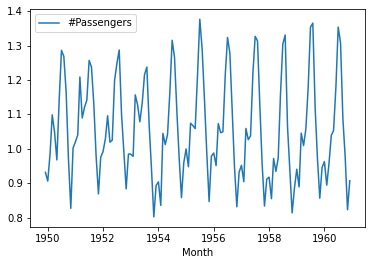

In [18]:
df_div = df / rolling_mean

sns.lineplot(data=df_div)

<AxesSubplot:xlabel='Month'>

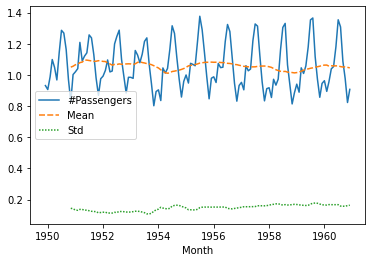

In [19]:
rolling_mean_div = df_div.rolling(window=12).mean()
rolling_std_div = df_div.rolling(window=12).std()

df_summary = df_div.assign(Mean=rolling_mean_div)
df_summary = df_summary.assign(Std=rolling_std_div)

sns.lineplot(data=df_summary)

In [20]:
adf_div = adfuller(df_div.dropna())

print_adf(adf_div)

ADF test statistic -3.034425217431025
p-value 0.03180220053455359
Lags used 13
Observations used 119
Critical values {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


The ADF for the division is less than 0.05 so the result is stationary

Next we can try to do a decomposition on the above series since it is stationary:

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decomposition = seasonal_decompose(df_div.dropna())

<AxesSubplot:xlabel='Month', ylabel='trend'>

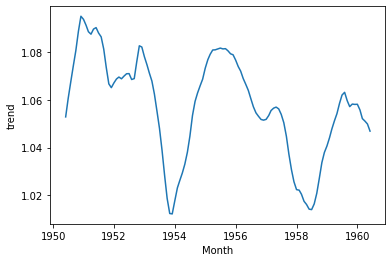

In [23]:
trend = decomposition.trend

sns.lineplot(data=trend.dropna())

<AxesSubplot:xlabel='Month', ylabel='seasonal'>

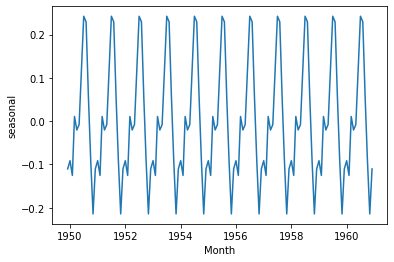

In [24]:
seasonal = decomposition.seasonal

sns.lineplot(data=seasonal.dropna())

<AxesSubplot:xlabel='Month', ylabel='resid'>

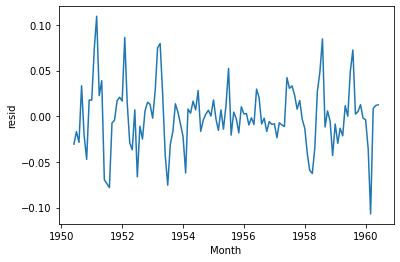

In [25]:
resid = decomposition.resid

sns.lineplot(data=resid.dropna())